# **Lab: Heart Attack Prediction**

This tutorial demonstrates heart attack prediction using three different models including decision tree, naive bayes, and support vector machines. This lab will help you grasp an idea of how could you approach the problem and recall your python implementation skill.

## **Step 1: Import Libraries**

All the necessary libraries are listed below.

In [1]:
import pandas as pd             # provide a table object and data analysis tools
import numpy as np              # provide an array object and mathematical operations

import matplotlib.pyplot as plt # provide visualization tools
%matplotlib inline
import seaborn as sns           # provide visualization tools

from sklearn.model_selection import train_test_split  # provide hold-out method
from sklearn.tree import DecisionTreeClassifier       # provide decision tree model
from sklearn.naive_bayes import GaussianNB            # provide naive bayes model
from sklearn.svm import SVC                           # provide support vector machines model

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report # provide evaluation metrics

import pickle                   # provide saving and loading tool

## **Step 2: Import the Dataset**

We will import the dataset directly via `drive.mount()` function which is the simplest approach to connect to the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here, change the destination paths to your paths where you kept your dataset.

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/ML, CS-KMITL, 2-2566/Labs/Lab 1 - Heart Attack Prediction/heart_attack_training.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML, CS-KMITL, 2-2566/Labs/Lab 1 - Heart Attack Prediction/heart_attack_testing.csv')

## **Step 3: Explore the Data**

### **Step 3.1: Get an Overview**

We can use `DataFrame.head()` to view the top 5 rows.

In [4]:
train_data.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Heart_Attack
0,60,2,0,1,150,1,50,Yes
1,69,2,1,1,170,0,60,Yes
2,52,1,0,0,174,1,35,No
3,66,2,1,1,169,0,60,Yes
4,70,3,0,1,237,0,65,Yes


In [5]:
test_data.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
0,61,0,1,1,139,1,50
1,55,2,1,2,163,0,40
2,53,1,1,1,172,0,55
3,58,1,1,2,206,0,70
4,62,2,1,1,148,1,50


We can use `DataFrame.describe()` to view statistical details.

In [6]:
train_data.describe()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,62.978261,1.695652,0.623188,0.920290,177.391304,0.442029,55.434783
std,7.853092,0.824875,0.486352,0.764749,32.262707,0.498437,12.373126
min,42.000000,0.000000,0.000000,0.000000,122.000000,0.000000,35.000000
25%,58.000000,1.000000,0.000000,0.000000,161.000000,0.000000,45.000000
50%,63.000000,2.000000,1.000000,1.000000,172.000000,0.000000,55.000000
75%,69.000000,2.000000,1.000000,1.750000,188.750000,1.000000,60.000000
max,81.000000,3.000000,1.000000,2.000000,239.000000,1.000000,80.000000


In [7]:
test_data.describe()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,62.931884,1.695652,0.623188,0.920290,178.265217,0.456522,55.434783
std,7.898650,0.822477,0.484939,0.762526,32.289026,0.498467,12.337158
min,42.000000,0.000000,0.000000,0.000000,122.000000,0.000000,35.000000
25%,58.000000,1.000000,0.000000,0.000000,161.000000,0.000000,45.000000
50%,63.000000,2.000000,1.000000,1.000000,173.000000,0.000000,55.000000
75%,69.000000,2.000000,1.000000,2.000000,192.000000,1.000000,60.000000
max,81.000000,3.000000,1.000000,2.000000,239.000000,1.000000,80.000000


We can use `DataFrame.info()` to print a concise summary of a dataframe.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                138 non-null    int64 
 1   Marital_Status     138 non-null    int64 
 2   Gender             138 non-null    int64 
 3   Weight_Category    138 non-null    int64 
 4   Cholesterol        138 non-null    int64 
 5   Stress_Management  138 non-null    int64 
 6   Trait_Anxiety      138 non-null    int64 
 7   Heart_Attack       138 non-null    object
dtypes: int64(7), object(1)
memory usage: 8.8+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                690 non-null    int64
 1   Marital_Status     690 non-null    int64
 2   Gender             690 non-null    int64
 3   Weight_Category    690 non-null    int64
 4   Cholesterol        690 non-null    int64
 5   Stress_Management  690 non-null    int64
 6   Trait_Anxiety      690 non-null    int64
dtypes: int64(7)
memory usage: 37.9 KB


### **Step 3.2: Check for Null or Empty Column**

Here, if we want to ensure that there is no null value then we commonly use `DataFrame.isnull()` or `DataFrame.isna()` to detect null value.

In [10]:
train_data.isnull().sum()

Age                  0
Marital_Status       0
Gender               0
Weight_Category      0
Cholesterol          0
Stress_Management    0
Trait_Anxiety        0
Heart_Attack         0
dtype: int64

In [11]:
test_data.isnull().sum()

Age                  0
Marital_Status       0
Gender               0
Weight_Category      0
Cholesterol          0
Stress_Management    0
Trait_Anxiety        0
dtype: int64

### **Step 3.3: Check if the Data Is Balanced**

It is a good practice to always check for imbalanced data to ensure that the training and validation steps will goes correctly using `DataFrame.value_counts()`.

In [12]:
train_data.Heart_Attack.value_counts()

No     70
Yes    68
Name: Heart_Attack, dtype: int64

Let's plot it to get a better view.

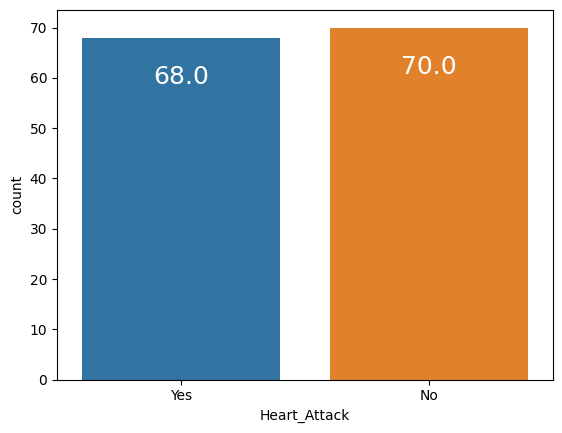

In [13]:
ax = sns.countplot(x='Heart_Attack', data=train_data)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.40, p.get_height()), ha='center', va='top', color='white', size=18)

plt.show()

### **Step 3.4: Explore the Data However You Want**

Now, we might want to use `mean()` function to reduce the amount of information we need to inspect and try to come up with some assumptions.

In [14]:
train_data.groupby('Heart_Attack').mean()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
Heart_Attack,,,,,,,
No,59.128571,1.4,0.471429,0.371429,161.342857,0.657143,49.571429
Yes,66.941176,2.0,0.779412,1.485294,193.911765,0.220588,61.470588


The above dataframe shown that people who got a heart attack are likely to be older and also have a higher cholesterol than those who are healthy. On the other hand, the mean values of Marital_Status, Gender, and Weight_Category does not give us any information.

How about plotting the number of people who got heart attack in each age.

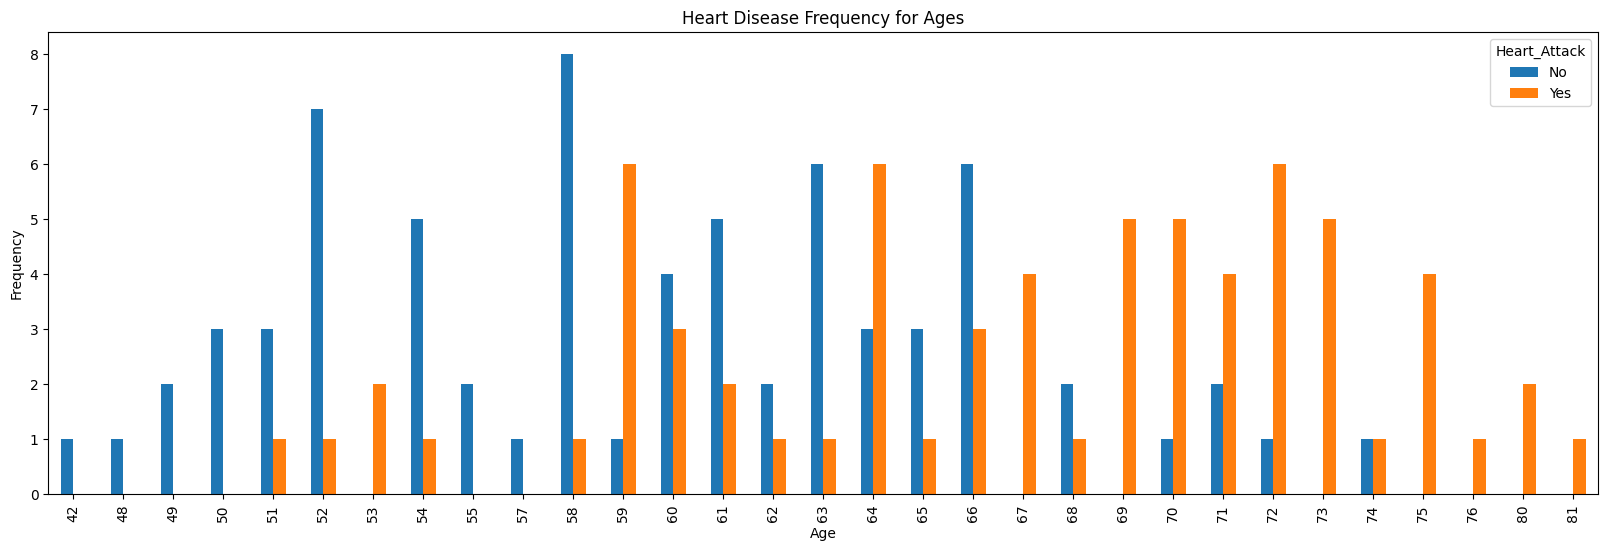

In [15]:
pd.crosstab(train_data.Age, train_data.Heart_Attack).plot(kind='bar', figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see the trends that the older we are the risker of getting heart attack we get.

What about gender?

In [16]:
train_data.groupby('Gender').count()

,Age,Marital_Status,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Heart_Attack
Gender,,,,,,,
0,52,52,52,52,52,52,52
1,86,86,86,86,86,86,86


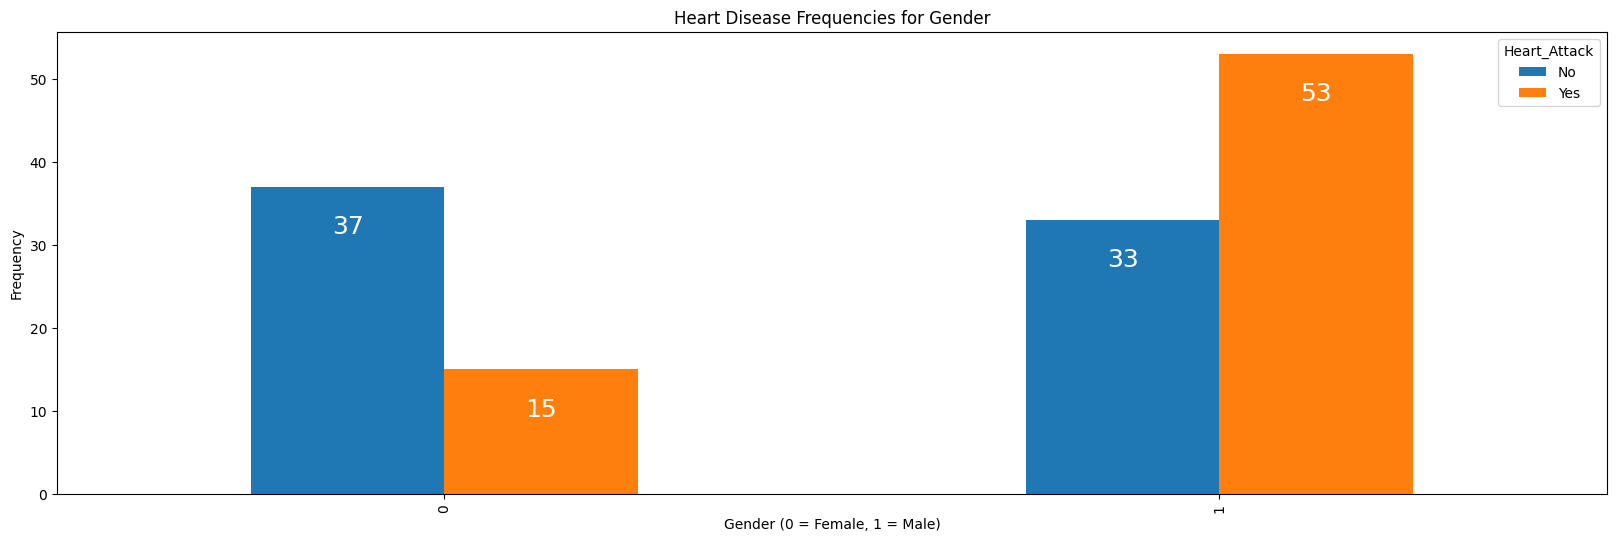

In [17]:
ax = pd.crosstab(train_data.Gender, train_data.Heart_Attack).plot(kind='bar', figsize=(20, 6))

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.125, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title('Heart Disease Frequencies for Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

And for some reason it seems that men are more likely to get a heart attack than women.

What about cholesterol?

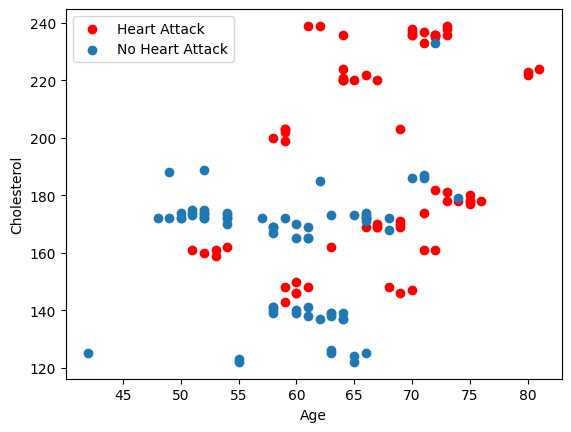

In [18]:
plt.scatter(x=train_data.Age[train_data.Heart_Attack=='Yes'], y=train_data.Cholesterol[train_data.Heart_Attack=='Yes'], c='red')
plt.scatter(x=train_data.Age[train_data.Heart_Attack=='No'], y=train_data.Cholesterol[train_data.Heart_Attack=='No'])
plt.legend(['Heart Attack', 'No Heart Attack'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

Well, probably related to heart attack as well :D

## **Step 4: Data Preparation**

### **Step 4.1: One-Hot Encoding**

One hot encoding is a process of converting categorical values to binary values so the machine learning algorithms does not take a sequence into account. However, the downside is that it take huge amount of memory when we are dealing with lots of columns.

In [19]:
train_data.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Heart_Attack
0,60,2,0,1,150,1,50,Yes
1,69,2,1,1,170,0,60,Yes
2,52,1,0,0,174,1,35,No
3,66,2,1,1,169,0,60,Yes
4,70,3,0,1,237,0,65,Yes


In [20]:
tmp_dummies = pd.get_dummies(train_data['Marital_Status'], prefix = 'Marital_Status')
tmp_dummies.head()

,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [21]:
train_data = pd.concat([train_data, tmp_dummies], axis = 1)
train_data.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Heart_Attack,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3
0,60,2,0,1,150,1,50,Yes,0,0,1,0
1,69,2,1,1,170,0,60,Yes,0,0,1,0
2,52,1,0,0,174,1,35,No,0,1,0,0
3,66,2,1,1,169,0,60,Yes,0,0,1,0
4,70,3,0,1,237,0,65,Yes,0,0,0,1


### **Step 4.2: Drop All Unused Columns**

In [22]:
train_data = train_data.drop(columns = ['Marital_Status'])
train_data.head()

,Age,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Heart_Attack,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3
0,60,0,1,150,1,50,Yes,0,0,1,0
1,69,1,1,170,0,60,Yes,0,0,1,0
2,52,0,0,174,1,35,No,0,1,0,0
3,66,1,1,169,0,60,Yes,0,0,1,0
4,70,0,1,237,0,65,Yes,0,0,0,1


## **Step 5: Modeling**

In this section, we will conduct experiments with decision tree, naive bayes, and support vector machines.

### **Step 5.1: Hold-out Validation**

In [23]:
y = train_data['Heart_Attack']
X = train_data.drop(columns = ['Heart_Attack'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

### **Step 5.2: Build, Train and Evaluate a Decision Tree (Option 1)**

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
dt_predicted = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predicted)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
print('Test Accuracy: {:.2f}%'.format(dt_acc * 100))
print('Confusion Matrix: \n{}'.format(dt_conf_matrix))
print(classification_report(y_test, dt_predicted))

Test Accuracy: 96.43%
Confusion Matrix: 
[[17  0]
 [ 1 10]]
              precision    recall  f1-score   support

          No       0.94      1.00      0.97        17
         Yes       1.00      0.91      0.95        11

    accuracy                           0.96        28
   macro avg       0.97      0.95      0.96        28
weighted avg       0.97      0.96      0.96        28



### **Step 5.2: Build, Train and Evaluate a Naive Bayes (Option 2)**

In [26]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [27]:
nb_predicted = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_predicted)
nb_conf_matrix = confusion_matrix(y_test, nb_predicted)
print('Test Accuracy: {:.2f}%'.format(nb_acc * 100))
print('Confusion Matrix: \n{}'.format(nb_conf_matrix))
print(classification_report(y_test, nb_predicted))

Test Accuracy: 78.57%
Confusion Matrix: 
[[11  6]
 [ 0 11]]
              precision    recall  f1-score   support

          No       1.00      0.65      0.79        17
         Yes       0.65      1.00      0.79        11

    accuracy                           0.79        28
   macro avg       0.82      0.82      0.79        28
weighted avg       0.86      0.79      0.79        28



### **Step 5.2: Build, Train and Evaluate a Support Vector Machines (Option 3)**

In [28]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [29]:
svc_predicted = svc_model.predict(X_test)
svc_acc = accuracy_score(y_test, svc_predicted)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
print('Test Accuracy: {:.2f}%'.format(svc_acc * 100))
print('Confusion Matrix: \n{}'.format(svc_conf_matrix))
print(classification_report(y_test, svc_predicted))

Test Accuracy: 85.71%
Confusion Matrix: 
[[17  0]
 [ 4  7]]
              precision    recall  f1-score   support

          No       0.81      1.00      0.89        17
         Yes       1.00      0.64      0.78        11

    accuracy                           0.86        28
   macro avg       0.90      0.82      0.84        28
weighted avg       0.88      0.86      0.85        28



## **Step 6: Model Comparison**

In [30]:
model_eval = pd.DataFrame({'Model': ['Decision Tree', 'Naive Bayes', 'Support Vector Machines'],
                           'Accuracy': [dt_acc * 100, nb_acc * 100, svc_acc * 100]})
model_eval

,Model,Accuracy
0,Decision Tree,96.428571
1,Naive Bayes,78.571429
2,Support Vector Machines,85.714286


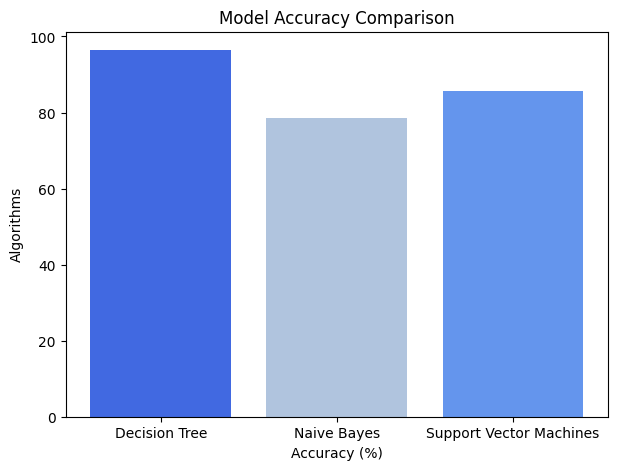

In [31]:
colors = ['royalblue', 'lightsteelblue', 'cornflowerblue']
plt.figure(figsize=(7, 5))
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy (%)")
plt.ylabel("Algorithms")
plt.bar(model_eval['Model'], model_eval['Accuracy'], color = colors)
plt.show()

## **Step 7: Save & Use the Model**

In the near future, you might want to deploy your machine learning model to production. `pickle()` function is one of the steps of deployment process. it is able to save your machine learning model, and then you can use that with web app, mobil app, or dekstop app afterwards.



### **Step 7.1: Save the Model**

In [32]:
file_name = 'decision_tree_model.sav'
pickle.dump(dt_model, open(file_name, 'wb'))

### **Step 7.2: Load & Use the Model**

In [33]:
loaded_model = pickle.load(open(file_name, 'rb'))

In [34]:
loaded_model_predicted = loaded_model.predict(X_test)
loaded_model_acc = accuracy_score(y_test, loaded_model_predicted)
print('Test Accuracy: {:.2f}%'.format(loaded_model_acc * 100))

Test Accuracy: 96.43%
